### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [25]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('data/coupons.csv')

In [26]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,NaN,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [27]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

2. Investigate the dataset for missing or problematic data.

In [28]:
# Investigate missing values
# Checking for total entries and missing values
print(data.shape)
print(data.isnull().sum())
print(data.dtypes)

# Clearly 'car' column has most missing values when coompared to total entries so it can be dropped
# Age column can be changed to have all integer values by considering Age 50+ as 50 and Below21 as 20

(12684, 26)
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiratio

3. Decide what to do about your missing data -- drop, replace, other...

In [29]:
# Clearly car column has only fraction of values and is not useful
# car where it has a value
data['car'].value_counts()

# remove car column
data = data.drop(columns=['car'])

In [30]:
# remove plus and below string from age column. We will treat the lowest and highest age as 21 and below and 50 and above respectively
data['age'] = data['age'].str.replace('plus', '').str.replace('below21', '20').str.strip()

data['age'].value_counts()

data['age'] = data['age'].astype(int)

4. What proportion of the total observations chose to accept the coupon?



In [31]:
total_coupons = data['coupon'].value_counts().sum()
coupons_accepted = data[data['Y'] == 1]['coupon'].value_counts().sum()

coupons_not_accepted = data[data['Y'] == 0]['coupon'].value_counts().sum()

# Percentage of coupons accepted
percentage_coupons_accepted = (coupons_accepted / total_coupons) * 100
print(f'Percentage of coupons accepted: {percentage_coupons_accepted}')

# Proportion of coupons accepted
proportion_coupons_accepted = coupons_accepted / total_coupons
print(f'Proportion of coupons accepted: {proportion_coupons_accepted}')

Percentage of coupons accepted: 56.84326710816777
Proportion of coupons accepted: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='count', ylabel='coupon'>

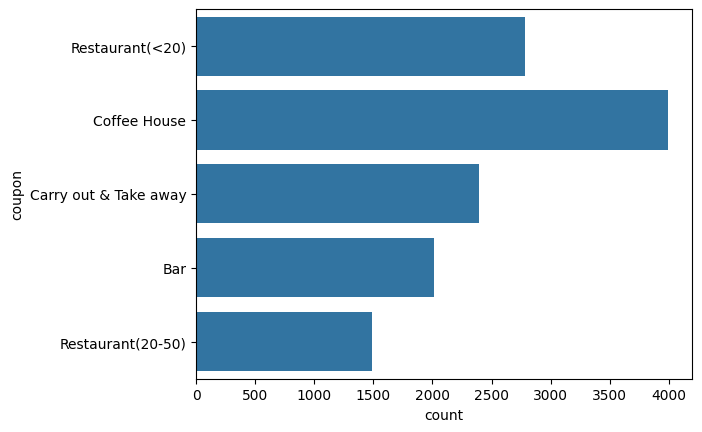

In [32]:
# Plotting coupons column
sns.countplot(data['coupon'])

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

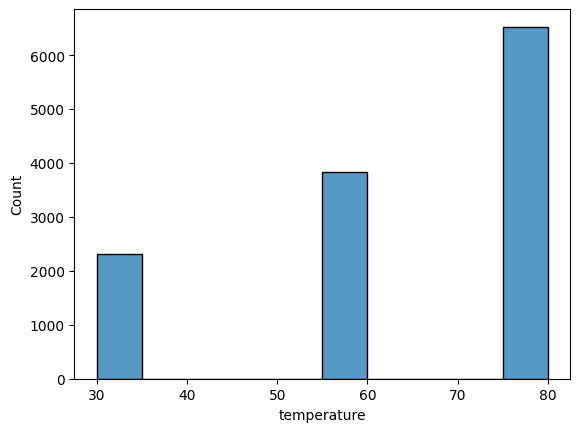

In [97]:
# Histogram for temperature
sns.histplot(data['temperature'], bins=10)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [98]:
# Dataframe  for 'bar' coupon
data_bar = data[data['coupon'] == 'Bar']
data_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,0,Bachelors degree,Sales & Related,$75000 - $87499,never,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [101]:
# Proportin of coupons accepted for 'Bar' coupon
data_bar_accepted = data_bar[data_bar['Y'] == 1]['coupon'].value_counts().sum()
data_bar_total = data_bar['coupon'].value_counts().sum()
proportion_bar_accepted = data_bar_accepted / data_bar_total
print(f'Proportion of coupons accepted for Bar: {proportion_bar_accepted}')


Proportion of coupons accepted for Bar: 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


Proportion of coupons accepted for Bar with 1~3 bars: 0.6473551637279596
Proportion of coupons accepted for Bar with 4~8 bars and gt8 bars: 0.7688442211055276


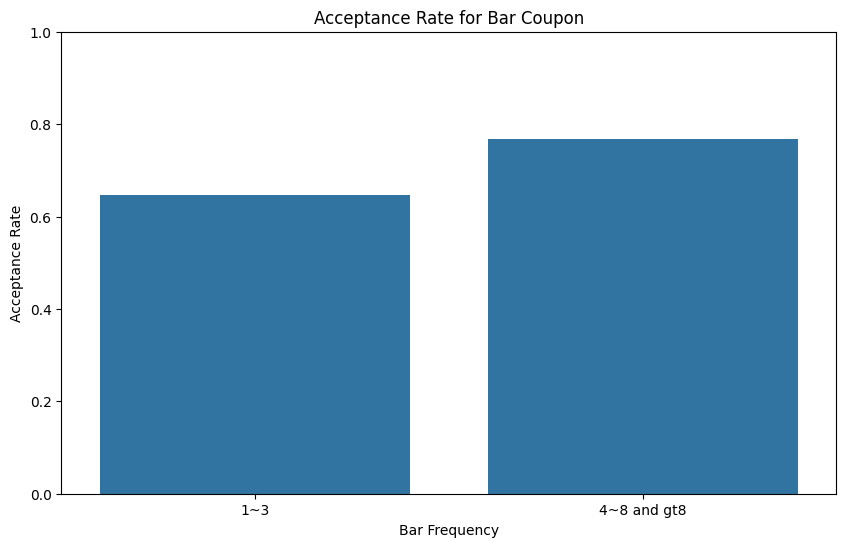

In [105]:
data_bar['Bar'].value_counts()

# Assuming the question is talking about people who went to the bar (excluding people who did not go to the bar)
data_bar_fewer_3 = data_bar[data_bar['Bar'] == '1~3']
data_bar_fewer_3
#Acceptance rate for 'Bar' coupon with 1~3 bars
data_bar_fewer_3_accepted = data_bar_fewer_3[data_bar_fewer_3['Y'] == 1]['coupon'].value_counts().sum()
data_bar_fewer_3_total = data_bar_fewer_3['coupon'].value_counts().sum()

data_bar_fewer_3_acceptance_rate = data_bar_fewer_3_accepted / data_bar_fewer_3_total

print(f'Proportion of coupons accepted for Bar with 1~3 bars: {data_bar_fewer_3_acceptance_rate}')

# Acceptance rate for 'Bar' coupon with 4~8 bars and gt8 bars
data_bar_more_3 = data_bar[(data_bar['Bar'] == '4~8') | (data_bar['Bar'] == 'gt8')]
data_bar_more_3_accepted = data_bar_more_3[data_bar_more_3['Y'] == 1]['coupon'].value_counts().sum()
data_bar_more_3_total = data_bar_more_3['coupon'].value_counts().sum()

data_bar_more_3_acceptance_rate = data_bar_more_3_accepted / data_bar_more_3_total

print(f'Proportion of coupons accepted for Bar with 4~8 bars and gt8 bars: {data_bar_more_3_acceptance_rate}')

# Result: Clearly the acceptance rate for 4~8 and gt8 bars is higher than 1~3 bars

# Plot the two acceptance rates
data_bar_acceptance = pd.DataFrame({'Bar Frequency': ['1~3', '4~8 and gt8'], 'Acceptance Rate': [data_bar_fewer_3_acceptance_rate, data_bar_more_3_acceptance_rate]})

plt.figure(figsize=(10, 6))
sns.barplot(x='Bar Frequency', y='Acceptance Rate', data=data_bar_acceptance)
plt.title('Acceptance Rate for Bar Coupon')
plt.xlabel('Bar Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits to 0-1
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Proportion of coupons accepted for Bar with 1~3, 4~8 and gt8 bars and age 25 and above: 0.6952380952380952
Proportion of coupons accepted for people who do not go to Bar and age below 25: 0.3932926829268293


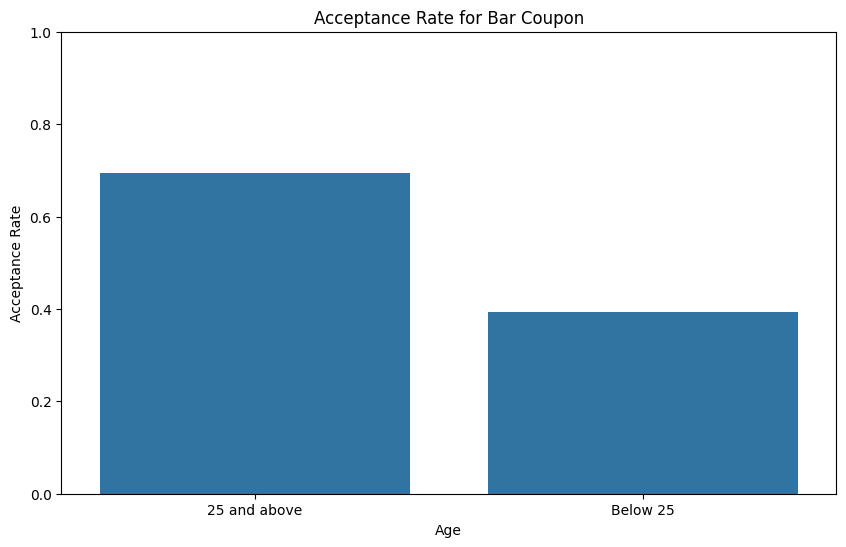

In [106]:
data_bar_more_once = data_bar[(data_bar['Bar'] == '1~3') | (data_bar['Bar'] == '4~8') | (data_bar['Bar'] == 'gt8')]
data_bar_more_once_age_25_above = data_bar_more_once[(data_bar_more_once['age'] >= 25)]

data_bar_more_once_age_25_above_accepted = data_bar_more_once_age_25_above[data_bar_more_once_age_25_above['Y'] == 1]['coupon'].value_counts().sum()
data_bar_more_once_age_25_above_total = data_bar_more_once_age_25_above['coupon'].value_counts().sum()
data_bar_more_once_age_25_above_acceptance_rate = data_bar_more_once_age_25_above_accepted / data_bar_more_once_age_25_above_total

print(f'Proportion of coupons accepted for Bar with 1~3, 4~8 and gt8 bars and age 25 and above: {data_bar_more_once_age_25_above_acceptance_rate}')

data_bar_rest = data_bar[(data_bar['Bar'] != '1~3') & (data_bar['Bar'] != '4~8') & (data_bar['Bar'] != 'gt8')]
data_bar_rest_age_25_below = data_bar_rest[(data_bar_rest['age'] < 25)]
data_bar_rest_age_25_below_accepted = data_bar_rest_age_25_below[data_bar_rest_age_25_below['Y'] == 1]['coupon'].value_counts().sum()
data_bar_rest_age_25_below_total = data_bar_rest_age_25_below['coupon'].value_counts().sum()
data_bar_rest_age_25_below_acceptance_rate = data_bar_rest_age_25_below_accepted / data_bar_rest_age_25_below_total

print(f'Proportion of coupons accepted for people who do not go to Bar and age below 25: {data_bar_rest_age_25_below_acceptance_rate}')

# Result: Clearly people who go to the bar have higher acceptance rate than people who do not go to the bar

# Plot the two acceptance rates
data_bar_age = pd.DataFrame({'Age': ['25 and above', 'Below 25'], 'Acceptance Rate': [data_bar_more_once_age_25_above_acceptance_rate, data_bar_rest_age_25_below_acceptance_rate]})
plt.figure(figsize=(10, 6))
sns.barplot(x='Age', y='Acceptance Rate', data=data_bar_age)
plt.title('Acceptance Rate for Bar Coupon')
plt.xlabel('Age')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits to 0-1
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


Proportion of coupons accepted for people who go to Bar with kid(s): 0.37777777777777777
Proportion of coupons accepted for people who go to Bar with no kid(s): 0.7132486388384754


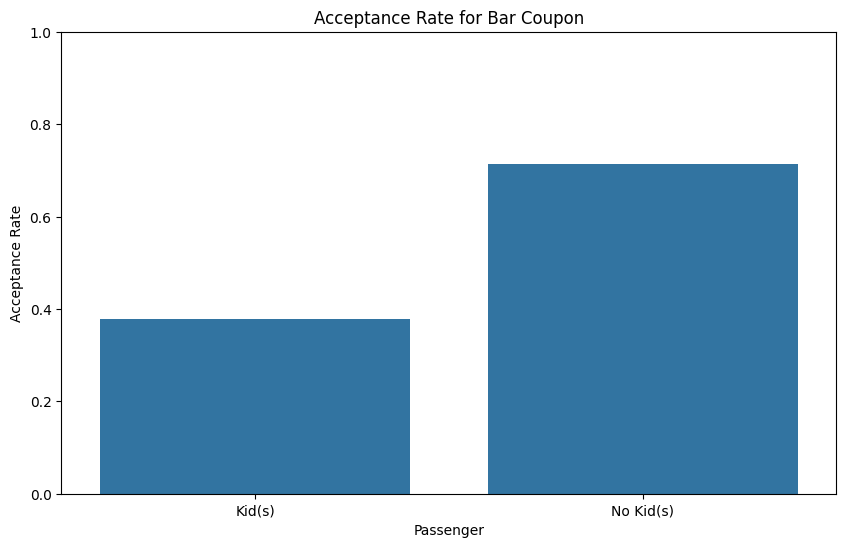

Proportion of coupons accepted for people who go to Bar with occupation other than Farming Fishing & Forestry: 0.4098605577689243
Proportion of coupons accepted for people who go to Bar with occupation Farming Fishing & Forestry: 0.4444444444444444


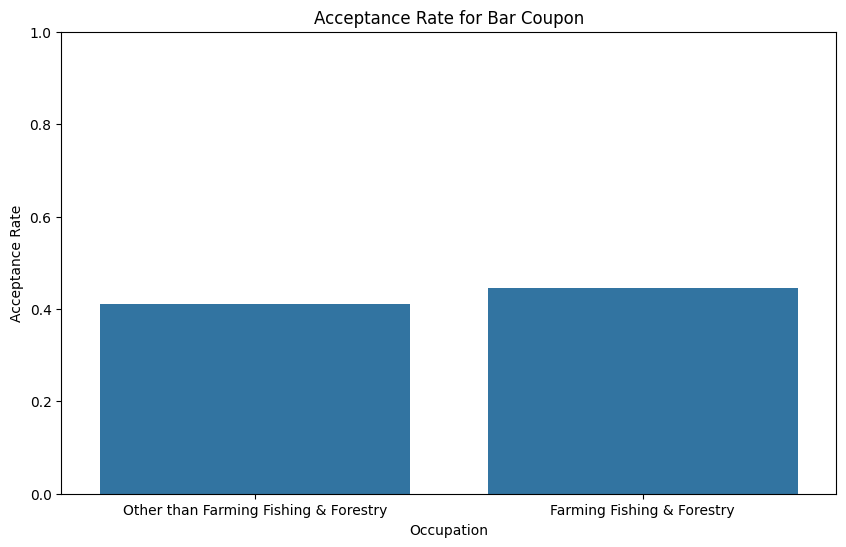

In [108]:
# Acceptance rate people who go to bar with passengers kid(s) and those who do not go with kid(s)
data_bar_more_than_once = data_bar[(data_bar['Bar'] == '1~3') | (data_bar['Bar'] == '4~8') | (data_bar['Bar'] == 'gt8')] 
#data_bar_more_than_once['passanger'].value_counts()

data_bar_more_than_once_passenger_kid = data_bar_more_than_once[data_bar_more_than_once['passanger'] == 'Kid(s)']
data_bar_more_than_once_passenger_kid_accepted = data_bar_more_than_once_passenger_kid[data_bar_more_than_once_passenger_kid['Y'] == 1]['coupon'].value_counts().sum()
data_bar_more_than_once_passenger_kid_total = data_bar_more_than_once_passenger_kid['coupon'].value_counts().sum()

data_bar_more_than_once_passenger_kid_acceptance_rate = data_bar_more_than_once_passenger_kid_accepted / data_bar_more_than_once_passenger_kid_total

print(f'Proportion of coupons accepted for people who go to Bar with kid(s): {data_bar_more_than_once_passenger_kid_acceptance_rate}')

data_bar_more_than_once_passenger_no_kid = data_bar_more_than_once[data_bar_more_than_once['passanger'] != 'Kid(s)']
data_bar_more_than_once_passenger_no_kid_accepted = data_bar_more_than_once_passenger_no_kid[data_bar_more_than_once_passenger_no_kid['Y'] == 1]['coupon'].value_counts().sum()
data_bar_more_than_once_passenger_no_kid_total = data_bar_more_than_once_passenger_no_kid['coupon'].value_counts().sum()
data_bar_more_than_once_passenger_no_kid_acceptance_rate = data_bar_more_than_once_passenger_no_kid_accepted / data_bar_more_than_once_passenger_no_kid_total

print(f'Proportion of coupons accepted for people who go to Bar with no kid(s): {data_bar_more_than_once_passenger_no_kid_acceptance_rate}')

# Result: People who go to the bar with kid(s) have lower acceptance rate than people who go to the bar with no kid(s)

# Plot the two acceptance rates
data_bar_passenger = pd.DataFrame({'Passenger': ['Kid(s)', 'No Kid(s)'], 'Acceptance Rate': [data_bar_more_than_once_passenger_kid_acceptance_rate, data_bar_more_than_once_passenger_no_kid_acceptance_rate]})
plt.figure(figsize=(10, 6))
sns.barplot(x='Passenger', y='Acceptance Rate', data=data_bar_passenger)
plt.title('Acceptance Rate for Bar Coupon')
plt.xlabel('Passenger')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits to 0-1
plt.show()

# Acceptance rate for people who go to the bar with occupation other than 'Farming Fishing & Forestry'
data_bar_occupation_not_farm_fish_forestry = data_bar[data_bar['occupation'] != 'Farming Fishing & Forestry']
data_bar_occupation_not_farm_fish_forestry_accepted = data_bar_occupation_not_farm_fish_forestry[data_bar_occupation_not_farm_fish_forestry['Y'] == 1]['coupon'].value_counts().sum()
data_bar_occupation_not_farm_fish_forestry_total = data_bar_occupation_not_farm_fish_forestry['coupon'].value_counts().sum()
data_bar_occupation_not_farm_fish_forestry_acceptance_rate = data_bar_occupation_not_farm_fish_forestry_accepted / data_bar_occupation_not_farm_fish_forestry_total

print(f'Proportion of coupons accepted for people who go to Bar with occupation other than Farming Fishing & Forestry: {data_bar_occupation_not_farm_fish_forestry_acceptance_rate}')

# Acceptance rate for people who go to the bar with occupation 'Farming Fishing & Forestry'
data_bar_occupation_farm_fish_forestry = data_bar[data_bar['occupation'] == 'Farming Fishing & Forestry']
data_bar_occupation_farm_fish_forestry_accepted = data_bar_occupation_farm_fish_forestry[data_bar_occupation_farm_fish_forestry['Y'] == 1]['coupon'].value_counts().sum()
data_bar_occupation_farm_fish_forestry_total = data_bar_occupation_farm_fish_forestry['coupon'].value_counts().sum()
data_bar_occupation_farm_fish_forestry_acceptance_rate = data_bar_occupation_farm_fish_forestry_accepted / data_bar_occupation_farm_fish_forestry_total

print(f'Proportion of coupons accepted for people who go to Bar with occupation Farming Fishing & Forestry: {data_bar_occupation_farm_fish_forestry_acceptance_rate}')

# Result: People who go to the bar with occupation other than 'Farming Fishing & Forestry' have higher acceptance rate than people who go to the bar with occupation 'Farming Fishing & Forestry'

# Plot the two acceptance rates
data_bar_occupation = pd.DataFrame({'Occupation': ['Other than Farming Fishing & Forestry', 'Farming Fishing & Forestry'], 'Acceptance Rate': [data_bar_occupation_not_farm_fish_forestry_acceptance_rate, data_bar_occupation_farm_fish_forestry_acceptance_rate]})
plt.figure(figsize=(10, 6))
sns.barplot(x='Occupation', y='Acceptance Rate', data=data_bar_occupation)
plt.title('Acceptance Rate for Bar Coupon')
plt.xlabel('Occupation')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits to 0-1
plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [73]:
# Acceptance rate between drivers who go to bar more than once a month and are under age 30 vs those who are above age 30
data_bar_more_than_once_age_30_below = data_bar_more_than_once[data_bar_more_than_once['age'] < 31]
data_bar_more_than_once_age_30_below_accepted = data_bar_more_than_once_age_30_below[data_bar_more_than_once_age_30_below['Y'] == 1]['coupon'].value_counts().sum()
data_bar_more_than_once_age_30_below_total = data_bar_more_than_once_age_30_below['coupon'].value_counts().sum()
data_bar_more_than_once_age_30_below_acceptance_rate = data_bar_more_than_once_age_30_below_accepted / data_bar_more_than_once_age_30_below_total

print(f'Proportion of coupons accepted for people who go to Bar more than once a month and age below 30: {data_bar_more_than_once_age_30_below_acceptance_rate}')

data_bar_more_than_once_age_30_above = data_bar_more_than_once[data_bar_more_than_once['age'] > 30]
data_bar_more_than_once_age_30_above_accepted = data_bar_more_than_once_age_30_above[data_bar_more_than_once_age_30_above['Y'] == 1]['coupon'].value_counts().sum()
data_bar_more_than_once_age_30_above_total = data_bar_more_than_once_age_30_above['coupon'].value_counts().sum()
data_bar_more_than_once_age_30_above_acceptance_rate = data_bar_more_than_once_age_30_above_accepted / data_bar_more_than_once_age_30_above_total

print(f'Proportion of coupons accepted for people who go to Bar more than once a month and age above 30: {data_bar_more_than_once_age_30_above_acceptance_rate}')


Proportion of coupons accepted for people who go to Bar more than once a month and age below 30: 0.7217391304347827
Proportion of coupons accepted for people who go to Bar more than once a month and age above 30: 0.6414342629482072


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Based on above data about people who go to the bar we can conclude the following
    #  More drivers above age 30 go to bars
    #  They have occupation other than Farming Fishing & Forestry
    #  More people who do not have kid(s) with them have higher acceptance rate for the coupon
    #  People who go to bar more than 3 times have higher acceptance rate for the coupon
    # People over age 25 have higher acceptance rate for the coupon

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Proportion of coupons accepted by married male: 0.5650459921156373
Proportion of coupons accepted by married females: 0.5250266240681576


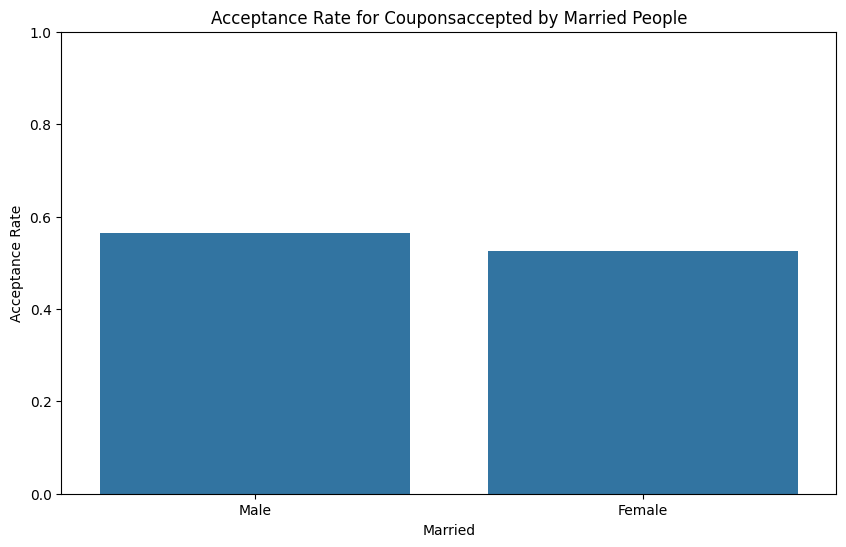

Proportion of coupons accepted by divorced male: 0.6967213114754098
Proportion of coupons accepted by divorced females: 0.47715736040609136


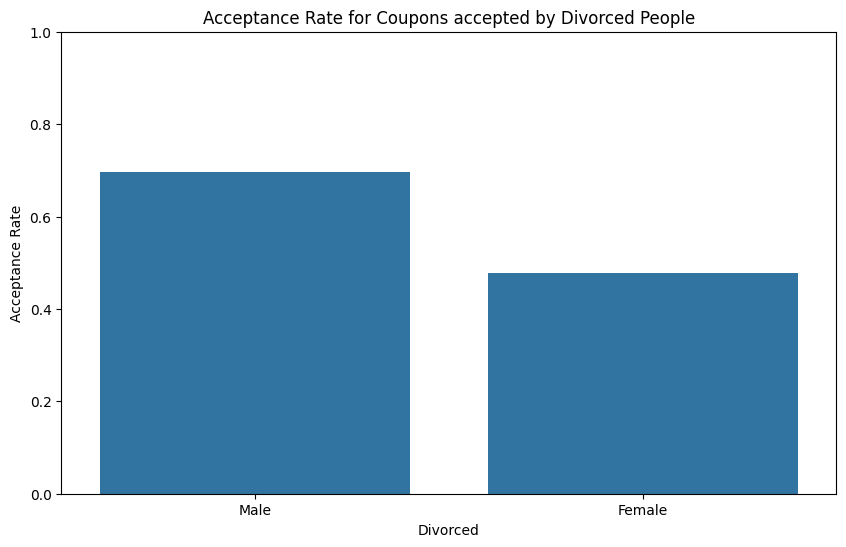

In [113]:
# Evaluate coupon accpetance rate based on gender, maritalStatus

data_male = data[data['gender'] == 'Male']
data_male_married = data_male[data_male['maritalStatus'] == 'Married partner']
data_male_married_accepted = data_male_married[data_male_married['Y'] == 1]['coupon'].value_counts().sum()
data_male_married_total = data_male_married['coupon'].value_counts().sum()
data_male_married_acceptance_rate = data_male_married_accepted / data_male_married_total

print(f'Proportion of coupons accepted by married male: {data_male_married_acceptance_rate}')

data_female = data[data['gender'] == 'Female']
data_female_married = data_female[data_female['maritalStatus'] == 'Married partner']
data_female_married_accepted = data_female_married[data_female_married['Y'] == 1]['coupon'].value_counts().sum()
data_female_married_total = data_female_married['coupon'].value_counts().sum()
data_female_married_acceptance_rate = data_female_married_accepted / data_female_married_total

print(f'Proportion of coupons accepted by married females: {data_female_married_acceptance_rate}')

# Acceptance rate of coupons for married men was slightly higher than married woman

# Plot the two acceptance rates
data_married = pd.DataFrame({'Gender': ['Male', 'Female'], 'Acceptance Rate': [data_male_married_acceptance_rate, data_female_married_acceptance_rate]})

plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Acceptance Rate', data=data_married)
plt.title('Acceptance Rate for Couponsaccepted by Married People')
plt.xlabel('Married')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits to 0-1
plt.show()

data_male_divorced = data_male[data_male['maritalStatus'] == 'Divorced']
data_male_divorced_accepted = data_male_divorced[data_male_divorced['Y'] == 1]['coupon'].value_counts().sum()
data_male_divorced_total = data_male_divorced['coupon'].value_counts().sum()
data_male_divorced_acceptance_rate = data_male_divorced_accepted / data_male_divorced_total

print(f'Proportion of coupons accepted by divorced male: {data_male_divorced_acceptance_rate}')

#custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
#sns.histplot(data=data_male_divorced, x='age', hue='coupon', palette=custom_colors, multiple='stack')

data_female_divorced = data_female[data_female['maritalStatus'] == 'Divorced']
data_female_divorced_accepted = data_female_divorced[data_female_divorced['Y'] == 1]['coupon'].value_counts().sum()
data_female_divorced_total = data_female_divorced['coupon'].value_counts().sum()
data_female_divorced_acceptance_rate = data_female_divorced_accepted / data_female_divorced_total

print(f'Proportion of coupons accepted by divorced females: {data_female_divorced_acceptance_rate}')

# Result
# Married male have slightly more acceptance rate compared to married females
# Divorced male have more acceptance rate compared to divorced females amd married males
# Divorced female have less acceptance rate compared to marrried females

# Plot the two acceptance rates
data_divorce = pd.DataFrame({'Gender': ['Male', 'Female'], 'Acceptance Rate': [data_male_divorced_acceptance_rate, data_female_divorced_acceptance_rate]})
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Acceptance Rate', data=data_divorce)
plt.title('Acceptance Rate for Coupons accepted by Divorced People')
plt.xlabel('Divorced')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1) # Set y-axis limits to 0-1
plt.show()

